/home/arda/miniconda3/envs/EoMT/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.000000011920929].


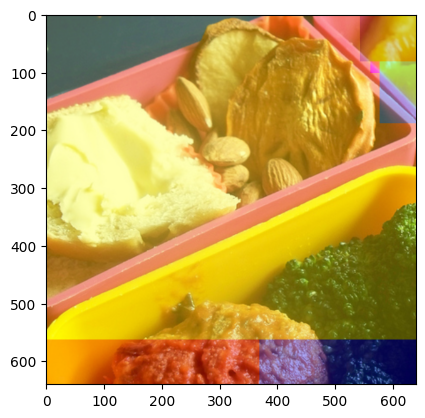

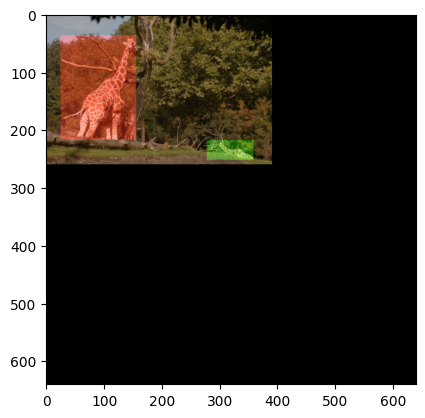

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.000000011920929].


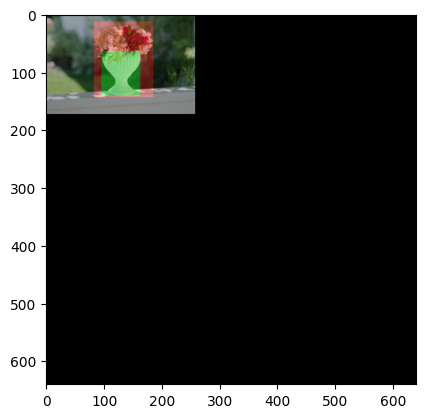

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.000000011920929].


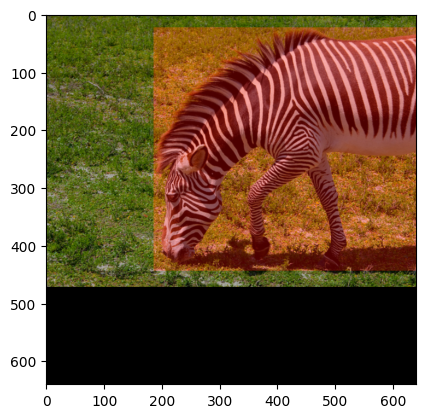

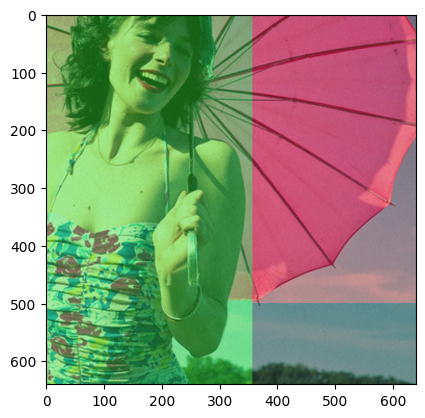

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.000000011920929].


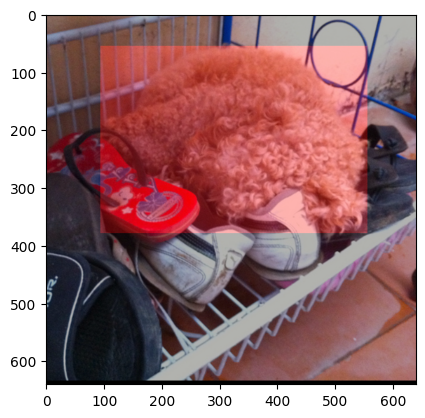

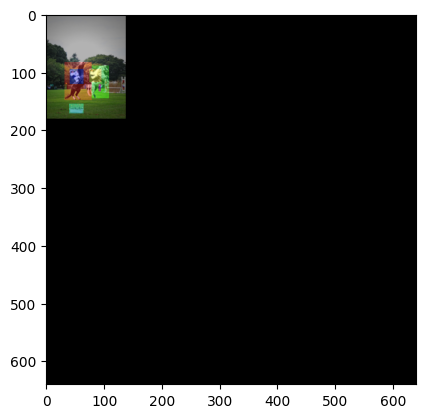

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.000000011920929].


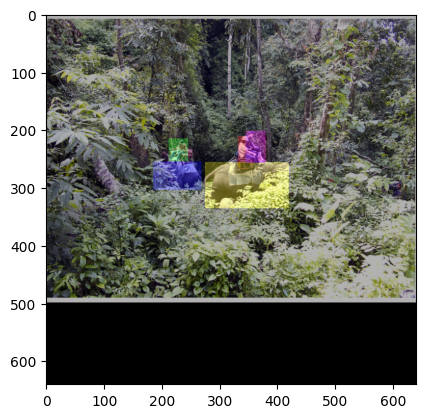

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.000000011920929].


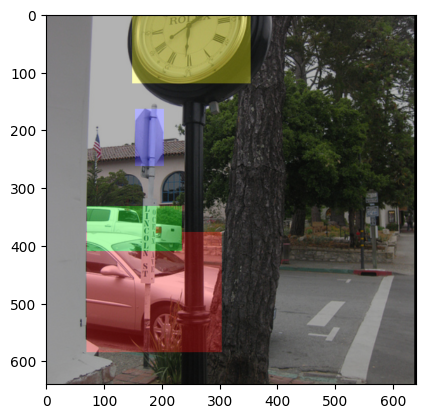

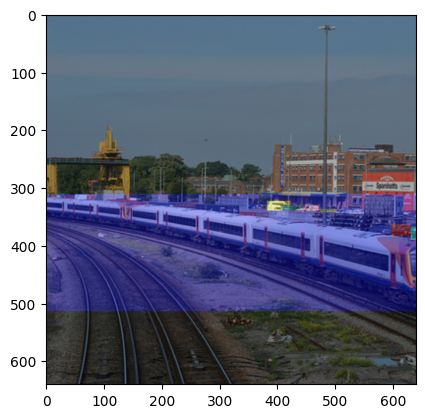

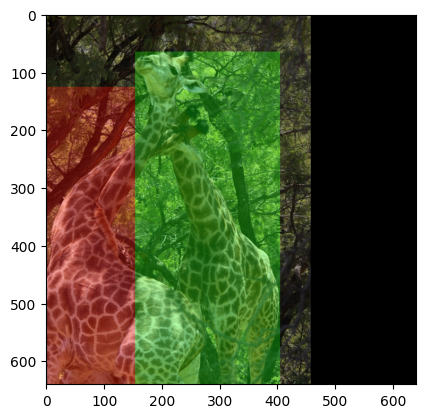

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.000000011920929].


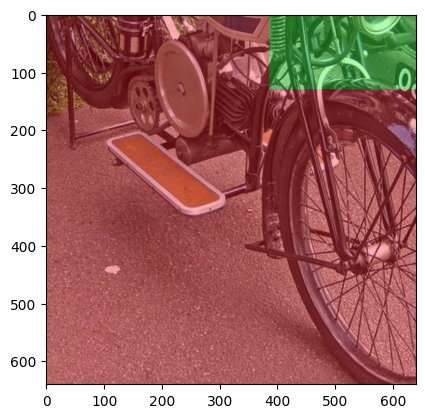

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.000000011920929].


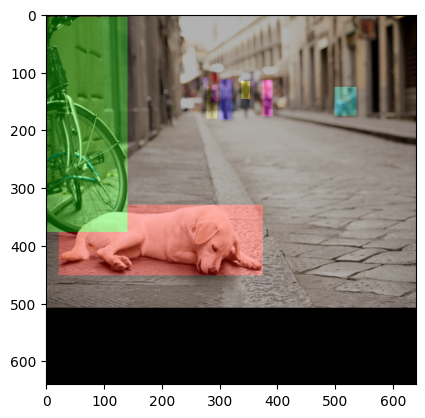

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.000000011920929].


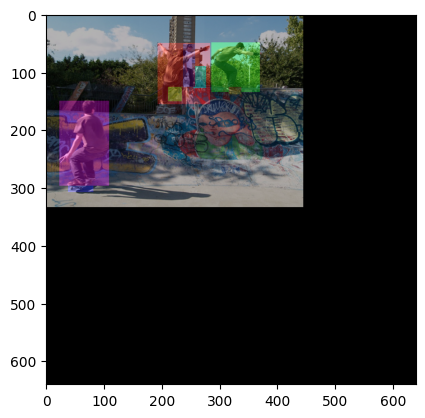

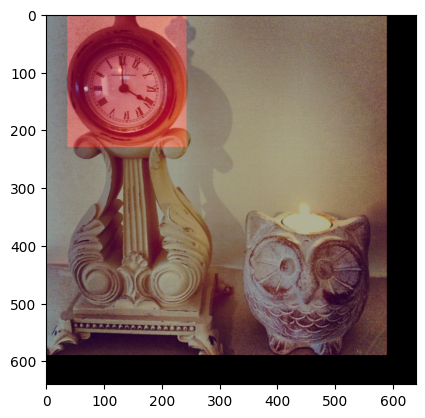

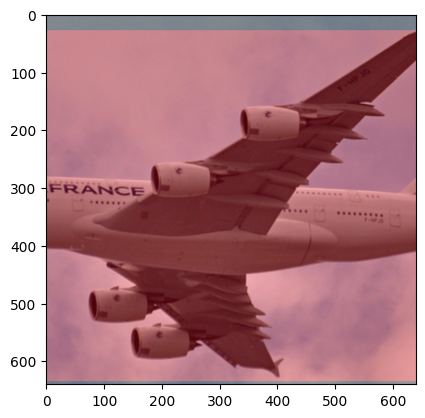

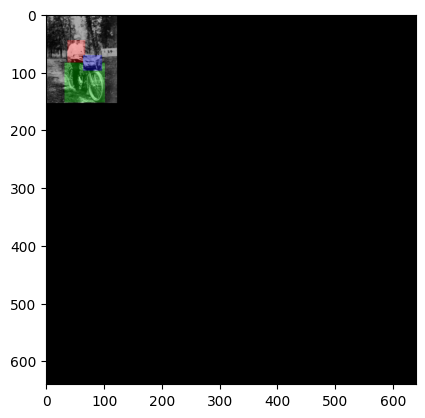

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.000000011920929].


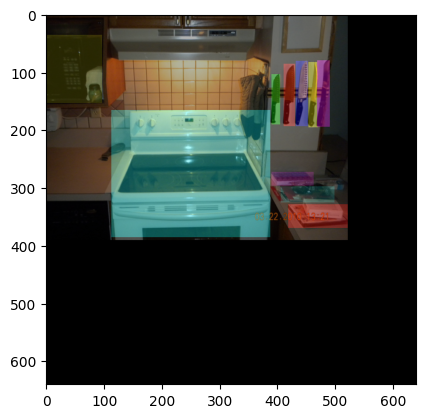

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.000000011920929].


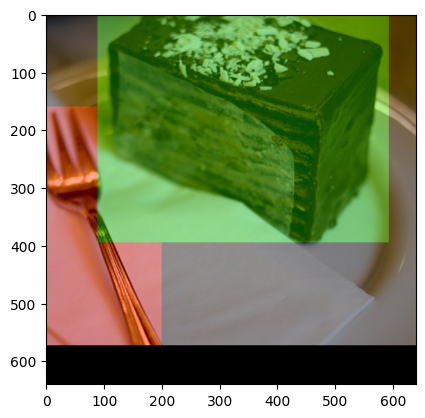

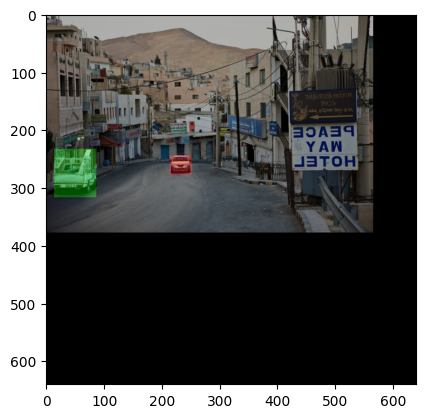

<Figure size 640x480 with 0 Axes>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.000000011920929].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.000000011920929].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.000000011920929].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.000000011920929].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.000000011920929].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.000000011920929].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0

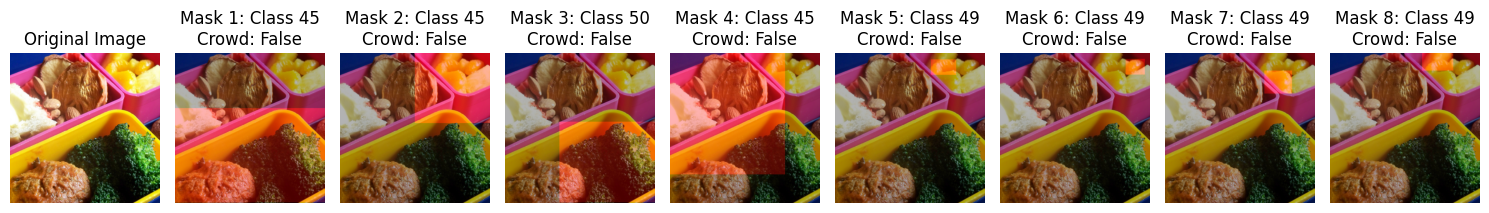

Image shape: torch.Size([3, 640, 640])
Number of masks: 8
Mask 1 shape: torch.Size([640, 640]), Class: 45
Mask 2 shape: torch.Size([640, 640]), Class: 45
Mask 3 shape: torch.Size([640, 640]), Class: 50
Mask 4 shape: torch.Size([640, 640]), Class: 45
Mask 5 shape: torch.Size([640, 640]), Class: 49
Mask 6 shape: torch.Size([640, 640]), Class: 49
Mask 7 shape: torch.Size([640, 640]), Class: 49
Mask 8 shape: torch.Size([640, 640]), Class: 49


In [1]:
import matplotlib.pyplot as plt
import torch
import numpy as np
from pathlib import Path
import sys
sys.path.append("../")
from datasets.coco_det import COCODetection

# Path to your COCO dataset
coco_path = "../data"  # Replace with your actual path

# Initialize the dataset
coco_det = COCODetection(
    path=coco_path,
    batch_size=20,
    img_size=(640, 640)
)

# Set up the dataset
coco_det.setup()

# Visualize a few samples
n_samples = 20

for i in range(n_samples):
    # Get a sample
    img, target = coco_det.train_dataset[i]
    
    # Convert image to numpy for display
    img_np = img.permute(1, 2, 0).numpy()
    # Normalize to 0-1 if needed
    if img_np.max() > 1.0:
        img_np = img_np / 255.0
    
    # Get masks from target
    masks = target["masks"]
    labels = target["labels"]
    
    # Create a combined mask for visualization (different colors for different objects)
    combined_mask = np.zeros((*masks.shape[1:], 3), dtype=np.float32)
    colors = [
        [1, 0, 0], [0, 1, 0], [0, 0, 1],
        [1, 1, 0], [1, 0, 1], [0, 1, 1],
        [0.5, 0.5, 0], [0.5, 0, 0.5], [0, 0.5, 0.5]
    ]
    
    for j, mask in enumerate(masks):
        color_idx = j % len(colors)
        for c in range(3):
            combined_mask[:, :, c] = np.where(
                mask.numpy(), colors[color_idx][c], combined_mask[:, :, c]
            )

    
    # Display image with masks overlay
    overlay = img_np.copy()
    overlay = overlay * 0.7 + combined_mask * 0.3  # 70% original image, 30% mask
    plt.imshow(overlay)
    plt.show()

    
    # Add class labels
    class_info = ", ".join([f"Class {label.item()}" for label in labels])


plt.tight_layout()
plt.show()

# Display a single example with more details
idx = 0  # Choose a sample with multiple objects
img, target = coco_det.train_dataset[idx]

# Convert image to numpy for display
img_np = img.permute(1, 2, 0).numpy()
if img_np.max() > 1.0:
    img_np = img_np / 255.0

# Get masks from target
masks = target["masks"]
labels = target["labels"]
is_crowd = target["is_crowd"]

# Create subplots - one for the image and one per mask
n_objects = len(masks)
if n_objects > 0:
    fig, axes = plt.subplots(1, n_objects + 1, figsize=(15, 5))
    
    # Handle case where there's only one subplot (no masks)
    if n_objects == 0:
        axes = [axes]  # Make it iterable
    
    # Display original image
    axes[0].imshow(img_np)
    axes[0].set_title("Original Image")
    axes[0].axis('off')
    
    # Display each mask separately
    for i in range(n_objects):
        mask_np = masks[i].numpy()
        
        # Create RGB mask (red channel only)
        mask_rgb = np.zeros((*mask_np.shape, 3), dtype=np.float32)
        mask_rgb[:, :, 0] = mask_np  # Red channel
        
        # Display mask with overlay
        overlay = img_np.copy()
        overlay = overlay * 0.7 + mask_rgb * 0.3  # 70% original image, 30% mask
        
        axes[i+1].imshow(overlay)
        axes[i+1].set_title(f"Mask {i+1}: Class {labels[i].item()}\nCrowd: {is_crowd[i].item()}")
        axes[i+1].axis('off')
    
    plt.tight_layout()
    plt.show()
else:
    # Handle case with no masks
    plt.figure(figsize=(8, 8))
    plt.imshow(img_np)
    plt.title("Original Image (No masks)")
    plt.axis('off')
    plt.show()

# Print shapes for verification
print(f"Image shape: {img.shape}")
print(f"Number of masks: {len(masks)}")
for i, mask in enumerate(masks):
    print(f"Mask {i+1} shape: {mask.shape}, Class: {labels[i].item()}")

Created /home/arda/thesis/eomt/data/annotations_instance.zip with folder structure preserved
